In [1]:
import matplotlib.pyplot as plt
#Dataset is imported and passed to df dataframe
import pandas as pd
from datetime import datetime
def open_csv_to_df(directory):
    df = pd.read_csv(directory)
    df = df.iloc[0:,:4]
    df.columns = ["Date", "Time", "Mass", "Velocity"]
    #df_energy = pd.DataFrame()
    df.insert(4, "Energy", "")
    df.insert(5, "Date+Time", "")
    df.insert(6, "deltatime", "")
    for i in range(len(df)):
        df.iloc[i,4] = 0.5 * float(df.iloc[i,2]) * float(df.iloc[i,3]) ** 2 / 1000 #calculation of Energy
    df = df.sort_values(['Date', 'Time']).reset_index(drop=True)
    df = df.dropna()

    for i in range(len(df)):
        date_raw = df.iloc[i,:].Date +" " +df.iloc[i,:].Time
        date1 = datetime.strptime(date_raw, '%Y-%m-%d %H:%M')
        df.iloc[i,5] = date1

    for i in range(len(df)-1):
        date1 = df.iloc[i,5]
        date2 = df.iloc[i+1,5]
        deltatime = date2 - date1
        deltatime = (deltatime.days*24) + (deltatime.seconds//3600)
        df.iloc[i+1,6] = deltatime

    return df #this is the table with all stones combined


In [12]:
df1 = open_csv_to_df("./out_1.csv")
df2 = open_csv_to_df("./out_2.csv")
df = open_csv_to_df("./out_2.csv")



In [77]:
slotboard = []  #creating a board with all slots and inside a slot are all stones that fall during this period,
for i in range(1,4):
    for j in range(1,32):
        slot = []
        if j == 9:
            date1 = "2019-0"+str(i)+"-0"+str(j)
            date2 = "2019-0"+str(i)+"-10"
        elif j >= 10:
            date1 = "2019-0"+str(i)+"-"+str(j)
            date2 = "2019-0"+str(i)+"-"+str(j+1)
        elif j < 9:
            date1 = "2019-0"+str(i)+"-0"+str(j)
            date2 = "2019-0"+str(i)+"-0"+str(j+1)


        df_temp = df[df['Date'].str.match(date1)]
        df_temp2 = df[df['Date'].str.match(date2)]

        for x in range(len(df_temp)):  #all stones that fall in a slot after 8 a.m.
            timee = df_temp.iloc[x,1]
            timee = int(timee[0:2])
            if timee > 8:
                slot.append(df_temp.iloc[x,:])

        for x in range(len(df_temp2)):  #all stones that fall in a slot before 8 a.m. the next day
            timee = df_temp2.iloc[x,1]
            timee = int(timee[0:2])
            if timee <= 8:
                slot.append(df_temp2.iloc[x,:])

        slotboard.append(slot)

#print out all slots and their stones, separated by "--------"
for i in range(len(slotboard)):
    if len(slotboard[i]) != 0:
        for j in range(len(slotboard[i])):
            print(slotboard[i][j])
    print("--------------------------------------")

Date        2019-01-01
Time             09:00
Mass              38.0
Velocity          45.4
Energy        39.16204
Name: 0, dtype: object
--------------------------------------
Date        2019-01-03
Time             06:00
Mass             187.0
Velocity          41.6
Energy       161.80736
Name: 1, dtype: object
--------------------------------------
--------------------------------------
Date        2019-01-04
Time             10:00
Mass              36.0
Velocity          44.6
Energy        35.80488
Name: 2, dtype: object
--------------------------------------
--------------------------------------
--------------------------------------
Date        2019-01-07
Time             14:00
Mass               6.0
Velocity          41.2
Energy         5.09232
Name: 3, dtype: object
--------------------------------------
--------------------------------------
--------------------------------------
Date        2019-01-11
Time             06:00
Mass              65.0
Velocity          39.6
Energ

In [78]:
#calculation of incident, stored inside incident list if requirements are matched or net is broken
incident = []
for i in range(len(slotboard)): #iterating through all slots
    netz = 1
    weight = 0
    zwischenfall = []
    for j in range(len(slotboard[i])): #iterating through all stones inside a slot
        weight = weight + int(slotboard[i][j]["Mass_(kg)"])
        if netz == 0:
            zwischenfall.append(slotboard[i][j])
        elif weight > 2000:
            if slotboard[i][j]["Energy"] >= 500:
                netz = 0
                zwischenfall.append(slotboard[i][j])
        elif slotboard[i][j]["Energy"] >= 1000:
            netz = 0
            zwischenfall.append(slotboard[i][j])


    if len(zwischenfall) != 0:
        incident.append(zwischenfall)

#list is empty because no stone match our requirements, change 1000-> 100 to see how it would work
print(incident)

KeyError: 'Mass_(kg)'

In [79]:
#investigate how close we come to a incident
def incident_calc(slotboard):
    incident = []
    for i in range(len(slotboard)): #iterating through all slots
        weight = 0
        detail = []
        for j in range(len(slotboard[i])): #iterating through all stones inside a slot
            weight = weight + int(slotboard[i][j]["Mass_(kg)"])
            if weight > 2000:
                if slotboard[i][j]["Energy"] >= 500:
                    detail.append(1)
                    detail.append(1)
                    detail.append(slotboard[i][j]["Date"])
                    incident.append(detail)

            elif slotboard[i][j]["Energy"] >= 1000:
                detail.append(1)
                detail.append(1)
                detail.append(slotboard[i][j]["Date"])
                incident.append(detail)



            if len(slotboard[i]) == j+1:
                detail.append(weight/2000)
                detail.append(slotboard[i][j]["Date"])
                incident.append(detail)

    return incident


In [80]:
inc = incident_calc(slotboard)
dates = []
values = []
for i in range(len(inc)):
    values.append(inc[i][0])
    dates.append((inc[i][1]))


print(len(inc))
print(len(dates))
print(len(values))


KeyError: 'Mass_(kg)'

In [81]:
import matplotlib.pyplot as plts
plt.plot(values,"")

NameError: name 'values' is not defined

In [82]:
#testing for different times
def slotboard_creation(df,hour):
    slotboard = []  #creating a board with all slots and inside a slot are all stones that fall during this period,
    for i in range(1,4):
        for j in range(1,32):
            slot = []
            if j == 9:
                date1 = "2019-0"+str(i)+"-0"+str(j)
                date2 = "2019-0"+str(i)+"-10"
            elif j >= 10:
                date1 = "2019-0"+str(i)+"-"+str(j)
                date2 = "2019-0"+str(i)+"-"+str(j+1)
            elif j < 9:
                date1 = "2019-0"+str(i)+"-0"+str(j)
                date2 = "2019-0"+str(i)+"-0"+str(j+1)


            df_temp = df[df['Date'].str.match(date1)]
            df_temp2 = df[df['Date'].str.match(date2)]

            for x in range(len(df_temp)):  #all stones that fall in a slot after 8 a.m.
                timee = df_temp.iloc[x,1]
                timee = int(timee[0:2])
                if timee > hour:
                    slot.append(df_temp.iloc[x,:])

            for x in range(len(df_temp2)):  #all stones that fall in a slot before 8 a.m. the next day
                timee = df_temp2.iloc[x,1]
                timee = int(timee[0:2])
                if timee <= hour:
                    slot.append(df_temp2.iloc[x,:])

            slotboard.append(slot)
    return slotboard


In [83]:
x = []
v = []
med = []
for i in range(0,23):


    x.append(slotboard_creation(df,i))

    inc = incident_calc(x[i])
    values = []
    temp1 = 0
    for j in range(len(inc)):
        values.append(inc[j][0])
        temp1 += inc[j][0]
    v.append(values)
    temp2 = (temp1/len(x[i]))*100
    med.append(temp2)

#print(x[0])

#print(med)

for i in range(len(v)):
    total = 0
    for j in range(len(v[i])):
        #print(x[i][j])
        if v[i][j] >= 1:
            total += 1
    #print(total)

plt.plot(med)


KeyError: 'Mass_(kg)'

(array([0.01470588, 0.04411765, 0.08823529, 0.11764706, 0.14705882,
        0.22058824, 0.32352941, 0.35294118, 0.39705882, 0.47058824,
        0.48529412, 0.48529412, 0.51470588, 0.55882353, 0.61764706,
        0.63235294, 0.64705882, 0.70588235, 0.70588235, 0.72058824,
        0.72058824, 0.72058824, 0.73529412, 0.73529412, 0.75      ,
        0.75      , 0.77941176, 0.79411765, 0.79411765, 0.80882353,
        0.80882353, 0.80882353, 0.82352941, 0.83823529, 0.83823529,
        0.83823529, 0.85294118, 0.86764706, 0.86764706, 0.86764706,
        0.86764706, 0.88235294, 0.89705882, 0.89705882, 0.89705882,
        0.89705882, 0.91176471, 0.91176471, 0.91176471, 0.91176471,
        0.91176471, 0.91176471, 0.91176471, 0.91176471, 0.91176471,
        0.91176471, 0.91176471, 0.91176471, 0.91176471, 0.91176471,
        0.91176471, 0.92647059, 0.92647059, 0.92647059, 0.92647059,
        0.94117647, 0.94117647, 0.94117647, 0.94117647, 0.94117647,
        0.95588235, 0.95588235, 0.95588235, 0.95

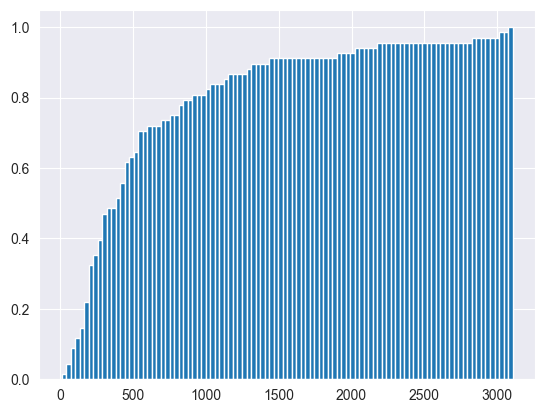

In [84]:
temp = df1.iloc[:,2]
temp = temp.sort_values()
plt.hist(temp,cumulative=True,density=True,bins=100)


In [85]:
import numpy as np
from scipy.stats import poisson

temp = df1.iloc[:,2]
#temp = temp.sort_values()
sns.displot(temp,bins=50, stat="probability", common_norm=True)
x = np.arange(0, 3150, 0.1)
y = poisson.pmf(x, mu=10, loc=250)
plt.plot(x,y,color="red")
plt.show()

NameError: name 'sns' is not defined

In [6]:
#Problem: Bei gewissen unsicher bezüglich Parameter. Können nicht alle gleich gecodet werden.
import statsmodels.api as sm
import numpy as np
from scipy import stats
sm.qqplot(df1.Mass, dist = stats.norm)
sm.qqplot(df1.Mass, dist = stats.expon)
sm.qqplot(df1.Mass, dist = stats.cauchy)
sm.qqplot(df1.Mass, dist = stats.lognorm)
sm.qqplot_2samples(df1.Mass, np.random.binomial(df1.Mass.mean(), 10000))
sm.qqplot_2samples(df1.Mass, np.random.poisson(df1.Mass.mean(), 10000))
sm.qqplot_2samples(df1.Mass, stats.poisson.rvs(df1.Mass.mean(), size = 10000))
sm.qqplot_2samples(df1.Mass, stats.gamma.rvs(df1.Mass.mean(), size = 10000))
sm.qqplot_2samples(df1.Mass, stats.lognorm.rvs(df1.Mass.mean(), size = 10000))
sm.qqplot_2samples(df1.Mass, stats.gamma.rvs(loc = df1.Mass.mean(), scale = df1.Mass.std(), size=10000))
sm.qqplot_2samples(df1.Mass, stats.laplace.rvs(loc = df1.Mass.mean(), scale = df1.Mass.std(), size=10000))

KeyboardInterrupt: 

#Verteilungsfunktionen bestimmen

In [3]:
from fitter import Fitter
import numpy as np
from scipy import stats
import statsmodels.api as sm
from tabulate import tabulate

def fit_distribution(data):
    count = 0
    fitted_mass = Fitter(data)
    fitted_mass.fit()
    ks_summary = fitted_mass.summary()
    distributions = ks_summary.index.values
    print(ks_summary.iloc[:,-2:])
    fig, ax = plt.subplots(1,5,figsize=(25, 5))
    table = [['Distribution', 'Parameters']]


    for i in distributions:
        param = fitted_mass.fitted_param[i]
        table.append([i, param])
        dist_eval = eval('stats.' + i + '.rvs(*param, size = 1000)')
        sm.qqplot_2samples(data, dist_eval, xlabel = i.capitalize() + ' Distribution', ylabel = 'Sample Distribution', line = '45' ,ax = ax[count])
        count += 1
    plt.show()
    print(tabulate(table, headers = 'firstrow'))

#Ablösungszone 1

##Masse

In [3]:
df2

,Date,Time,Mass,Velocity,Energy
0,2019-01-01,09:00,38.0,45.4,39.16204
1,2019-01-03,06:00,187.0,41.6,161.80736
2,2019-01-04,10:00,36.0,44.6,35.80488
3,2019-01-07,14:00,6.0,41.2,5.09232
4,2019-01-11,06:00,65.0,39.6,50.9652
5,2019-01-11,16:00,58.0,33.2,31.96496
6,2019-01-14,11:00,365.0,40.2,294.9273
7,2019-01-16,02:00,22.0,46.5,23.78475
8,2019-01-18,06:00,146.0,36.2,95.66212
9,2019-01-19,17:00,29.0,38.3,21.269905


Fitting 109 distributions: 100%|██████████| 109/109 [01:54<00:00,  1.05s/it]
C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


               ks_statistic  ks_pvalue
gennorm            0.262659   0.000125
nct                0.063312   0.931971
norminvgauss       0.054987   0.979261
genhyperbolic      0.055751   0.976320
invgamma           0.059734   0.956506


C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


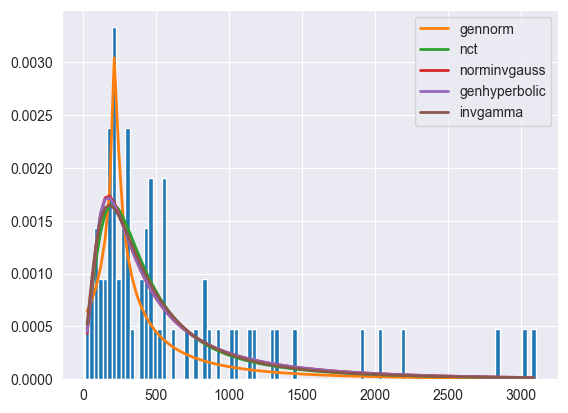

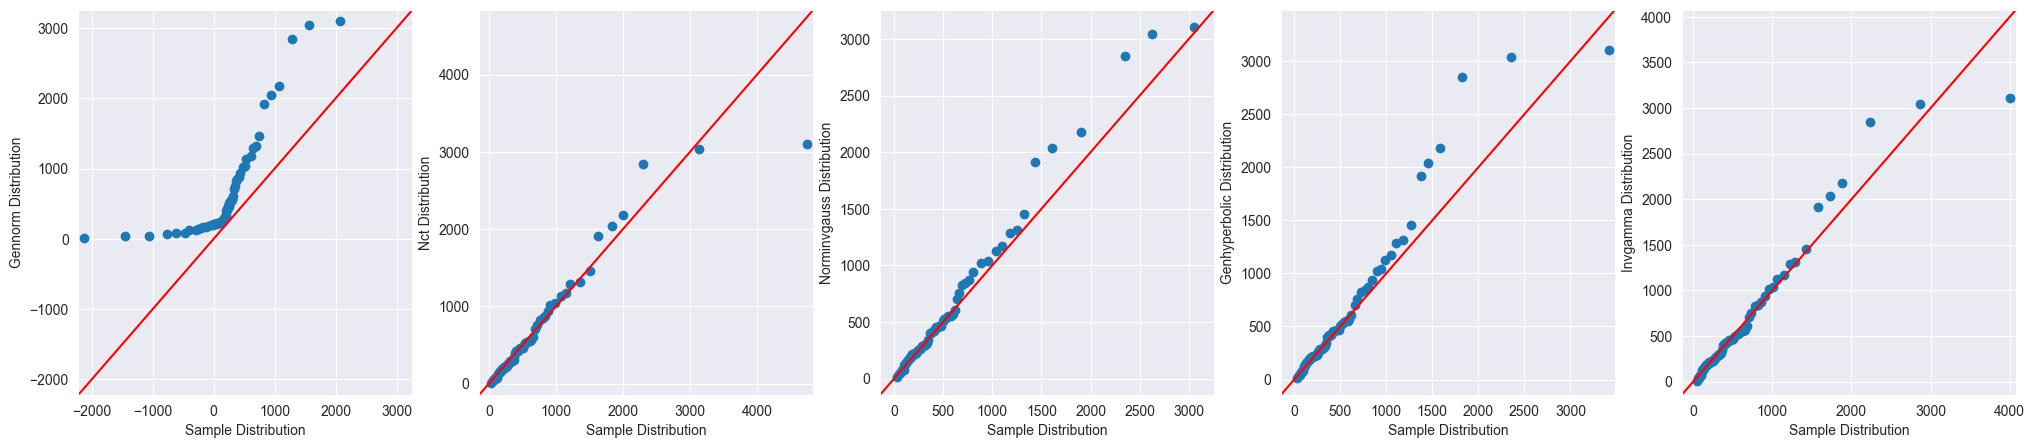

Distribution    Parameters
--------------  ---------------------------------------------------------------------------------------------------
gennorm         (0.4279160801639092, 219.99999994398019, 35.86654433090574)
nct             (1.7225348536963603, 3.7037541378718943, -114.50828494765057, 109.93539690382457)
norminvgauss    (3.1212660746620413, 3.049636729092045, 34.65446329649014, 129.49172019279249)
genhyperbolic   (-0.6161331856951546, 3.868715822305541, 3.8031427614177913, 17.26430842394451, 127.06396515473591)
invgamma        (2.15306844124149, -107.70820900423357, 901.310616335688)


In [20]:
fit_distribution(df1.Mass)

Fitting 109 distributions:  26%|██▌       | 28/109 [00:22<00:52,  1.54it/s]C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:3405: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]
C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:3405: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  97%|█████████▋| 106/109 [01:21<00:03,  1.04s/it]C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If i

              ks_statistic  ks_pvalue
burr12            0.047290   0.996307
johnsonsu         0.048367   0.995050
norminvgauss      0.048835   0.994412
powernorm         0.052305   0.987592
powerlognorm      0.052381   0.987394


C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


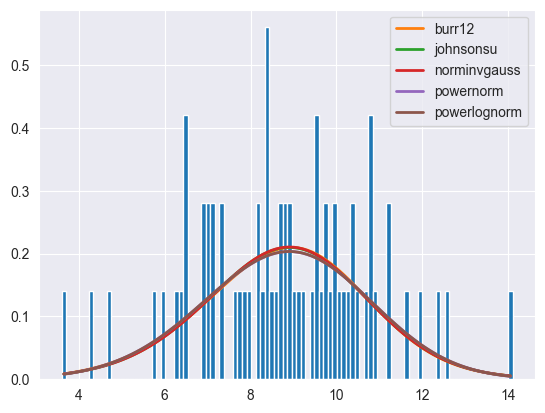

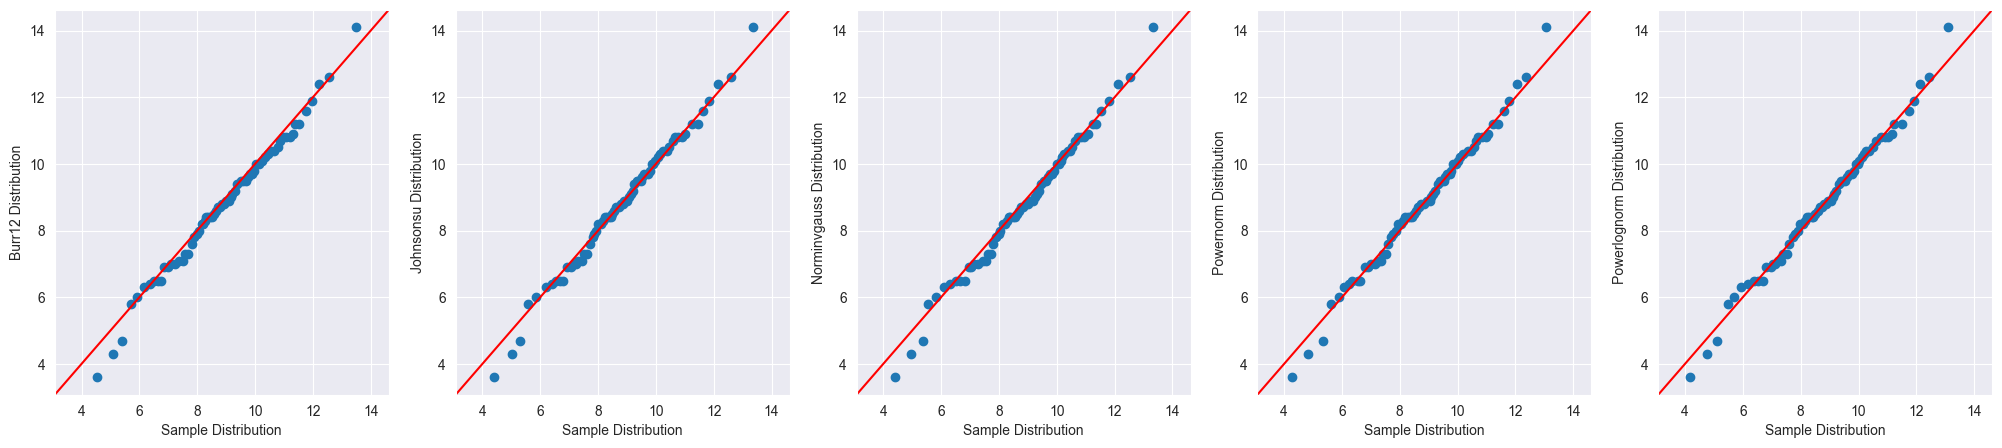

Distribution    Parameters
--------------  -----------------------------------------------------------------------------------
burr12          (6.95902507087807, 3.657292757257352, -1.653317575129317, 13.1378052621939)
johnsonsu       (0.5506392100269748, 3.647809358624267, 9.86702708776487, 6.858701190372882)
norminvgauss    (8.815229190843102, -1.1717104407578982, 9.56468292816113, 5.789676074259544)
powernorm       (1.7500203164009314, 9.860148880929664, 2.3093991060037284)
powerlognorm    (1.9974674649537931, 0.011413527595289373, -200.70959770400236, 210.83927376167787)


In [19]:
fit_distribution(df1.Velocity)

Fitting 109 distributions:  16%|█▌        | 17/109 [00:21<01:49,  1.19s/it]C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r 

            ks_statistic  ks_pvalue
cauchy          0.184306   0.200537
dweibull        0.210232   0.101723
gennorm         0.162648   0.329207
dgamma          0.209831   0.102868
skewcauchy      0.085099   0.959294


C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


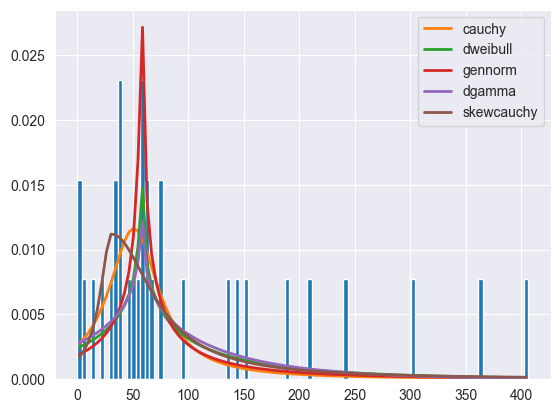

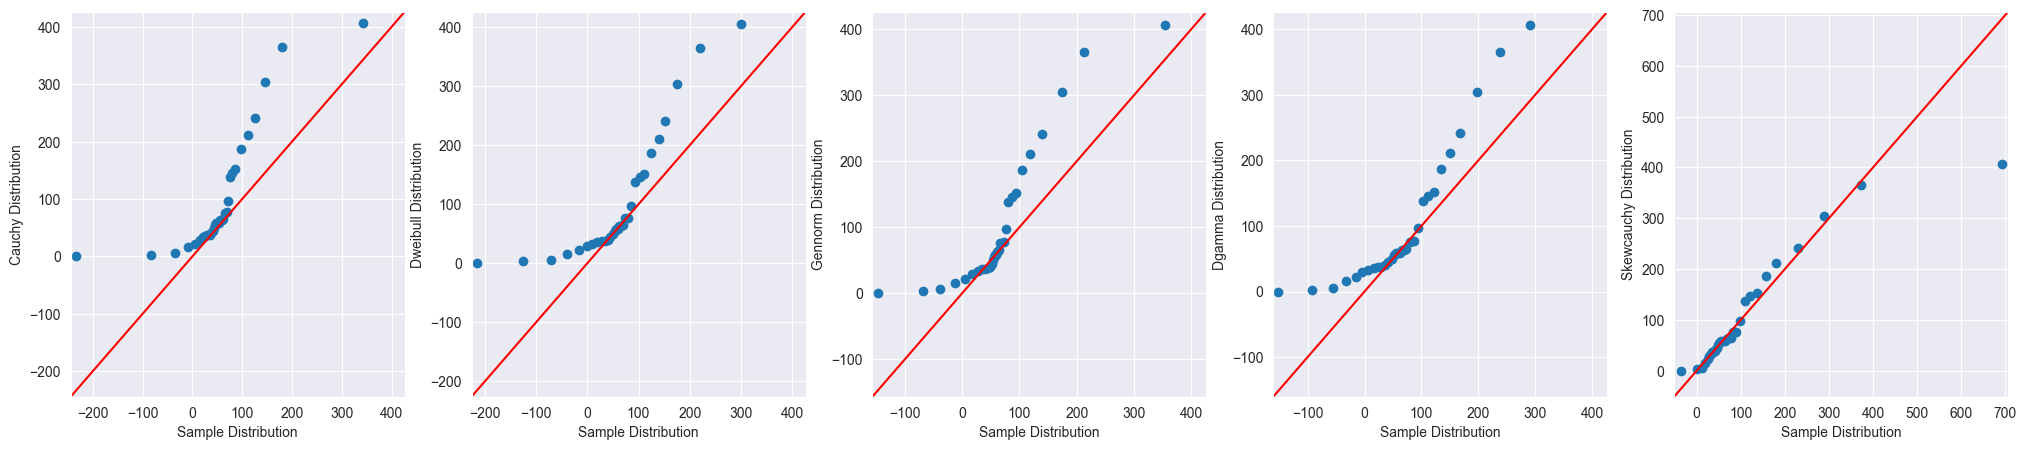

Distribution    Parameters
--------------  ------------------------------------------------------------
cauchy          (51.02159521968939, 27.34050279860369)
dweibull        (0.7662263893498762, 57.999999999999986, 69.9380178136768)
gennorm         (0.3386647887119331, 57.99999999999318, 1.386515049490003)
dgamma          (0.7945665637213004, 57.99999999999999, 90.05854563528045)
skewcauchy      (0.5654845478523323, 31.009036433794673, 28.383685799048294)


In [22]:
fit_distribution(df2.Mass)

Fitting 109 distributions:  35%|███▍      | 38/109 [00:35<00:28,  2.49it/s]C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:3405: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions: 100%|██████████| 109/109 [01:48<00:00,  1.01it/s]
C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_o

            ks_statistic  ks_pvalue
johnsonsb       0.078694   0.979807
argus           0.074869   0.987868
beta            0.074197   0.989000
genextreme      0.106050   0.827579
dweibull        0.101704   0.862169


C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


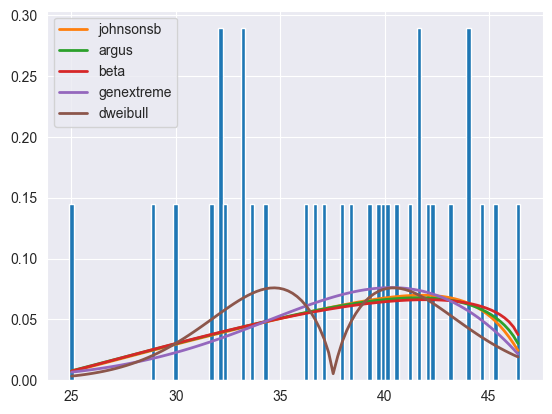

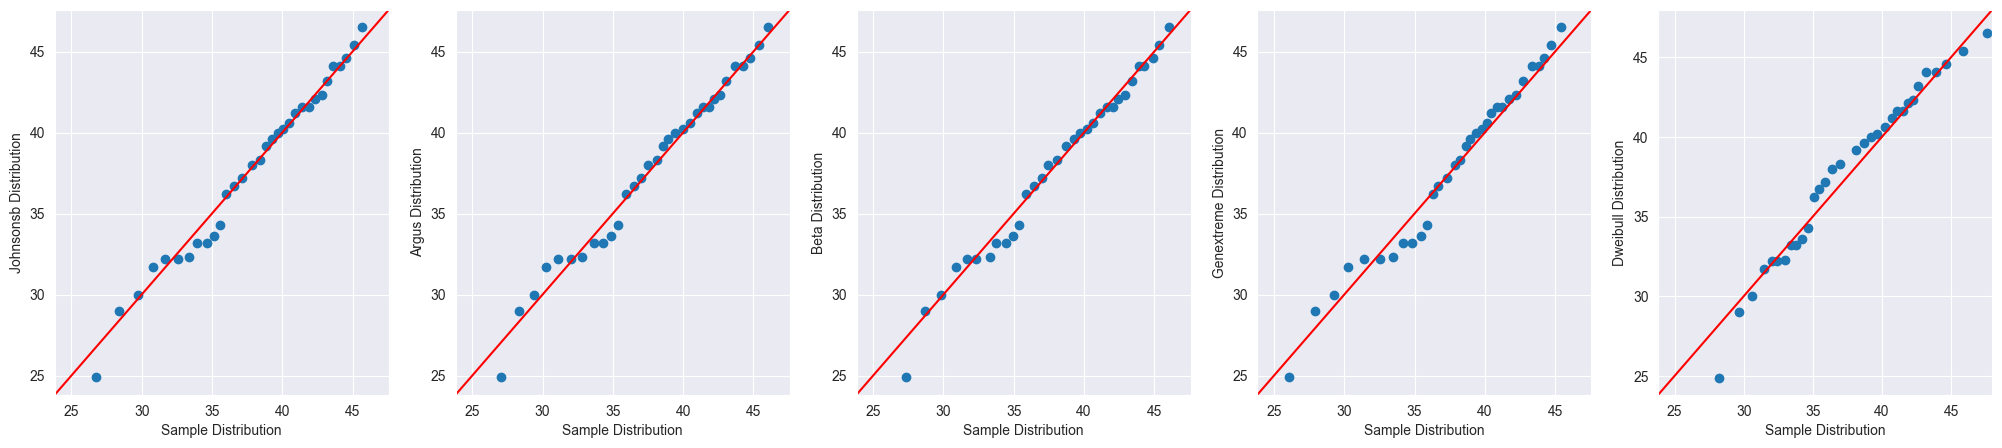

Distribution    Parameters
--------------  ---------------------------------------------------------------------------------
johnsonsb       (-0.5558603613471272, 0.9279041351963044, 22.024490438266007, 25.486067104168228)
argus           (0.9441392083611122, 23.279780568536218, 23.53433123913555)
beta            (2.135456049863241, 1.2827668923945292, 23.092130432299154, 23.56888476645474)
genextreme      (0.5431215683582513, 36.60692035815953, 5.811703427330377)
dweibull        (1.6432343986691575, 37.56165193417189, 5.064105003181602)


In [40]:
fit_distribution(df2.Velocity)

C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 d

             ks_statistic  ks_pvalue
exponpow         0.118600   0.731813
gausshyper       0.104718   0.851127
geninvgauss      0.135373   0.574443
mielke           0.168733   0.305214
expon            0.092643   0.930581


C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity

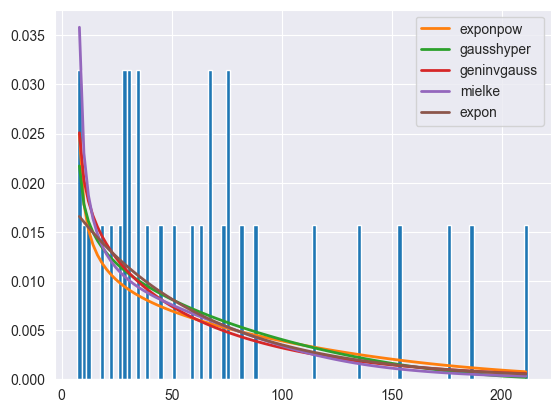

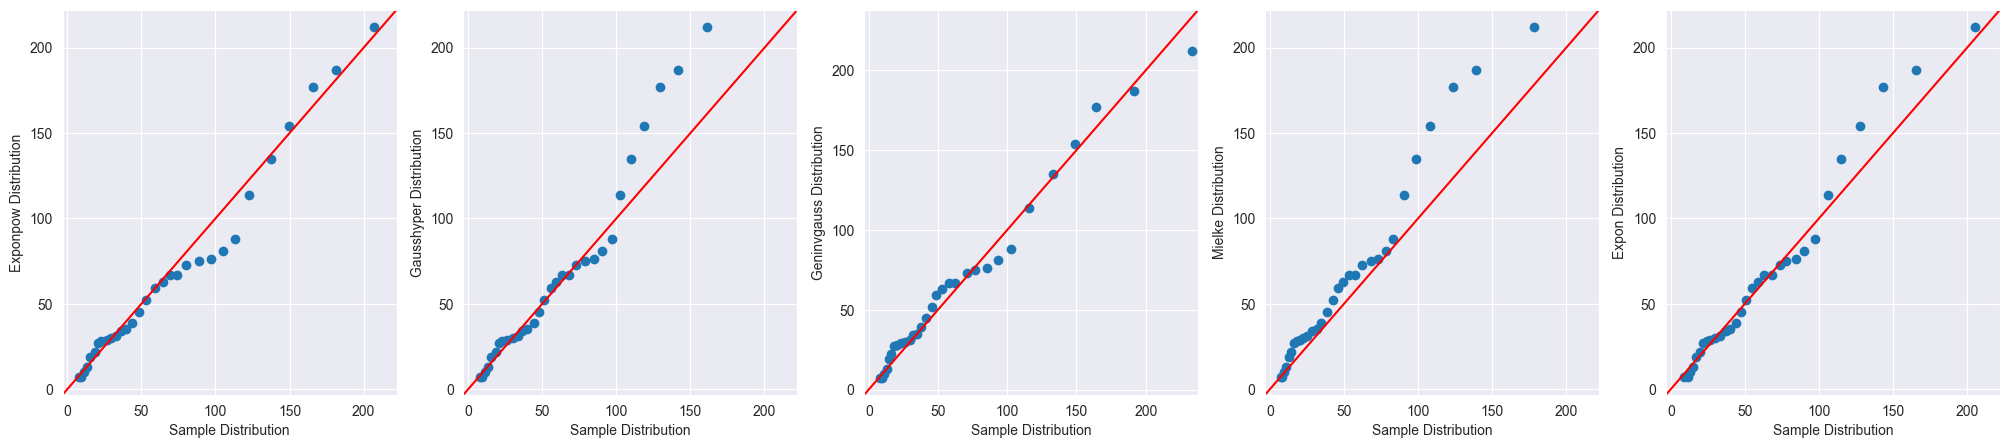

Distribution    Parameters
--------------  ------------------------------------------------------------------------------------------------------------------------
exponpow        (0.6971027846624209, 6.999999999999998, 117.24076623954022)
gausshyper      (0.8333456745137682, 3.400588536772172, 2.2572317562652344, -0.24445464658525204, 6.999999999999999, 243.13056435482488)
geninvgauss     (0.8346787592103018, 2.7774714107663524e-09, 6.999999999999999, 9.729511405897284e-08)
mielke          (0.5972742288201478, 3.397676130568745, 6.999999999999325, 109.37323513331276)
expon           (7.0, 59.322580645161295)


In [22]:
df2= df2.iloc[1: , :]
df2['deltatime'] = df2['deltatime'].astype('int')
fit_distribution(df2.deltatime)

Fitting 109 distributions:  28%|██▊       | 31/109 [00:14<00:51,  1.51it/s]C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:3405: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  91%|█████████ | 99/109 [00:44<00:08,  1.12it/s]C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_out

                  ks_statistic  ks_pvalue
nakagami              0.094485   0.555893
truncweibull_min      0.095267   0.545396
beta                  0.091049   0.602658
chi                   0.085211   0.683335
erlang                0.114612   0.317658


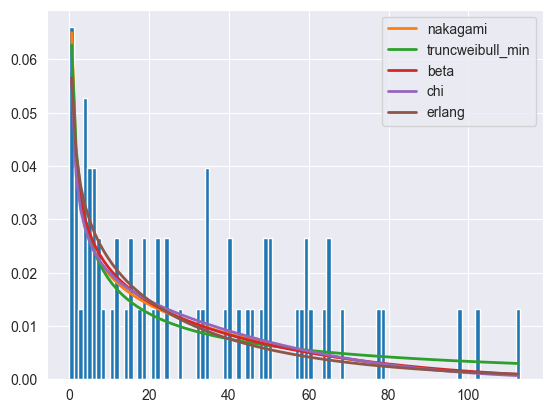

C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


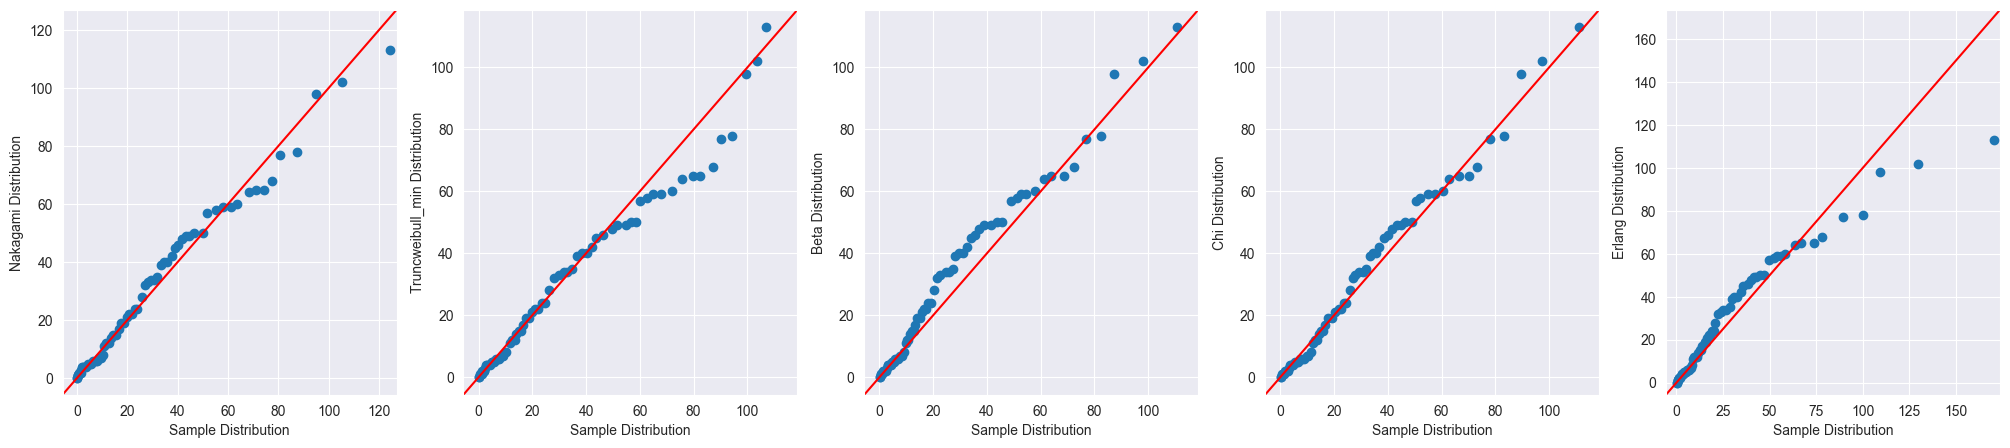

Distribution      Parameters
----------------  ------------------------------------------------------------------------------------------------------
nakagami          (0.29474316775462595, -2.8064802368464363e-30, 40.78237930942086)
truncweibull_min  (0.5862397011798735, 0.0038496819431781274, 1.233636906681157, -0.35373117349036387, 91.8858143365756)
beta              (0.6997644509440446, 3.4948819059403973, -1.5731268279153073e-29, 176.9027805107536)
chi               (0.6466917035616518, -8.620646255400194e-27, 50.086113926689904)
erlang            (0.7615490296010006, -3.2684116858324476e-25, 39.88396065899832)


In [21]:
#df1= df1.iloc[1: , :]
#df1['deltatime'] = df1['deltatime'].astype('int')
fit_distribution(df1.deltatime)

C:\Users\nrech\AppData\Local\Temp\ipykernel_27924\3694913705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deltatime'] = df1['deltatime'].astype('int')
Fitting 109 distributions:  37%|███▋      | 40/109 [00:03<00:05, 13.69it/s]C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:3405: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  92%|█████████▏| 100/109 [00:15<00:03,  2.53it/s]C:\Users\nrech\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the

                  ks_statistic  ks_pvalue
nakagami              0.094485   0.555893
truncweibull_min      0.095267   0.545396
beta                  0.091049   0.602658
chi                   0.085211   0.683335
erlang                0.114612   0.317658


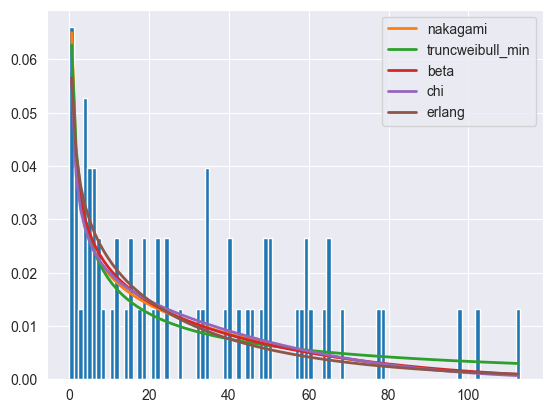

In [20]:
df1= df1.iloc[1: , :]
df1['deltatime'] = df1['deltatime'].astype('int')
fitted_mass = Fitter(df1.deltatime)
fitted_mass.fit()
summary_distributions = fitted_mass.summary()
distributions = summary_distributions.index.values
print(summary_distributions.iloc[:,-2:])

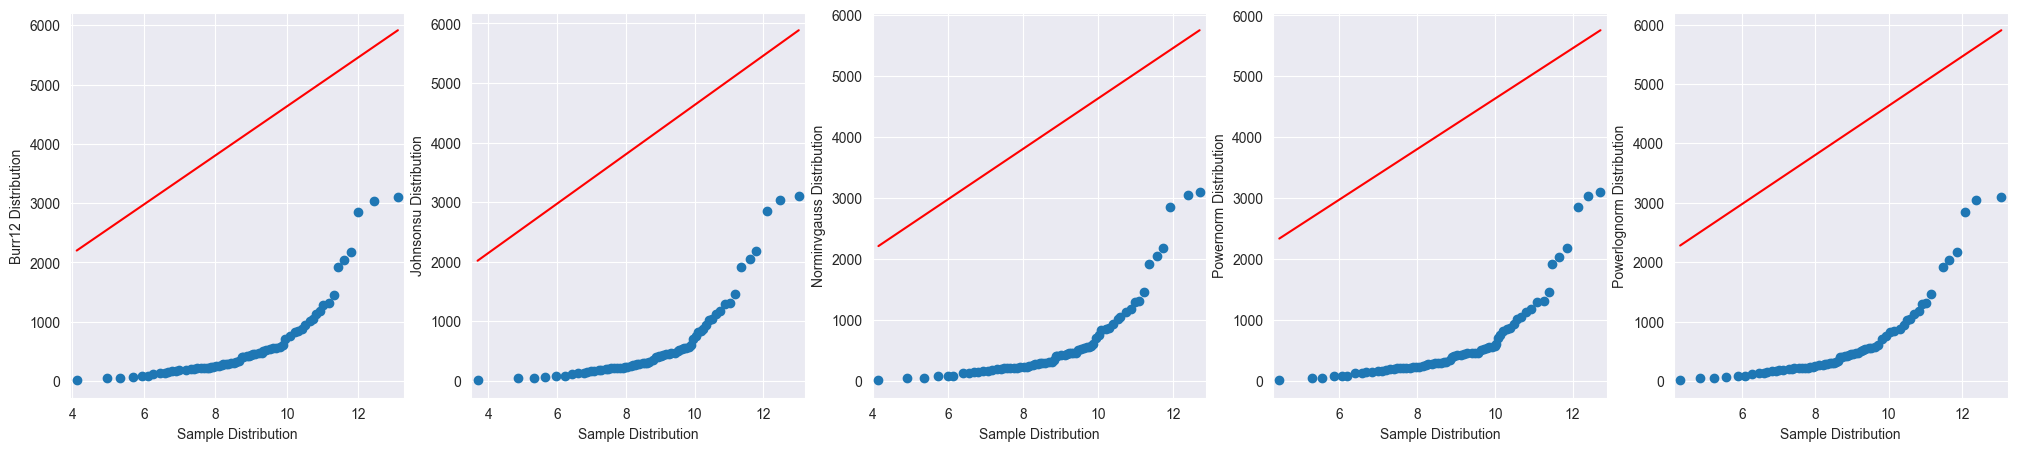

Distribution    Parameters
--------------  -----------------------------------------------------------------------------------
burr12          (6.95902507087807, 3.657292757257352, -1.653317575129317, 13.1378052621939)
johnsonsu       (0.5506392100269748, 3.647809358624267, 9.86702708776487, 6.858701190372882)
norminvgauss    (8.815229190843102, -1.1717104407578982, 9.56468292816113, 5.789676074259544)
powernorm       (1.7500203164009314, 9.860148880929664, 2.3093991060037284)
powerlognorm    (1.9974674649537931, 0.011413527595289373, -200.70959770400236, 210.83927376167787)


In [16]:


fig, ax = plt.subplots(1,5,figsize=(25, 5))
count = 0
table = [['Distribution', 'Parameters']]

for i in distributions:
    param = fitted_mass.fitted_param[i]
    table.append([i, param])

    dist_eval = eval('stats.' + i + '.rvs(*param, size = 1000)')
    sm.qqplot_2samples(df1.Mass, dist_eval, xlabel = i.capitalize() + ' Distribution', ylabel = 'Sample Distribution', line = 'q', ax = ax[count])
    count += 1
plt.show()
print(tabulate(table, headers = 'firstrow'))

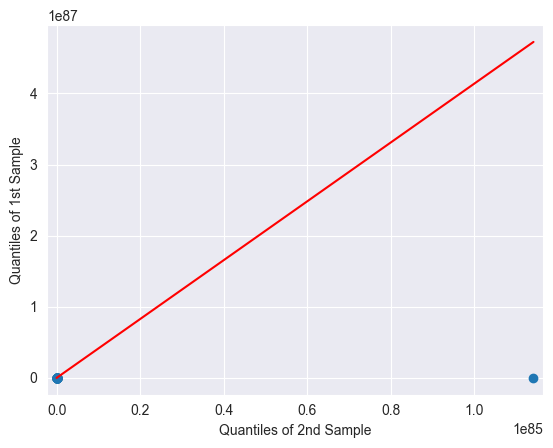

Error in callback <function flush_figures at 0x00000224A25D1E10> (for post_execute):


KeyboardInterrupt: 

In [17]:
sm.qqplot_2samples(df1.Mass, stats.burr12.rvs(*param, size = 1000),  line = 'q')

In [ ]:
param = fitted_mass.fitted_param[dists[0]]
variable = 'stats.gennorm.rvs(*param, size = 1000)'
sm.qqplot_2samples(df1.Mass, variable)

In [ ]:
param = fitted_mass.fitted_param['nct']
sm.qqplot_2samples(df1.Mass, stats.nct.rvs(*param, size = 1000))

In [ ]:
#Normal-inverse Gaussian (NIG)
param = f.fitted_param['norminvgauss']
sm.qqplot_2samples(df1.Mass, stats.norminvgauss.rvs(*param, size = 1000))
stats.ks_2samp(df1.Mass, stats.norminvgauss.rvs(*param, size = 1000))

In [ ]:
param = f.fitted_param['invgamma']
sm.qqplot_2samples(df1.Mass, stats.invgamma.rvs(2.15306844124149, -107.70820900423357, 901.310616335688, size = 1000))
stats.ks_2samp(df1.Mass, np.random.exponential(size = 1000))

In [ ]:
sm.qqplot_2samples(df1.Mass, stats.invgamma.rvs(2.15306844124149, -107.70820900423357,901.310616335688,2.15306844124149, size = 1000))

In [14]:
df1.dtypes

Date          object
Time          object
Mass         float64
Velocity     float64
Energy        object
Date+Time     object
deltatime     object
dtype: object

In [19]:
df1['deltatime'] = df1['deltatime'].astype('int')

ValueError: invalid literal for int() with base 10: ''